In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt 
sns.set()

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

import warnings 
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('Datasets/Bank_data.csv')

In [8]:
df.shape

(518, 8)

In [9]:
df.head()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no


In [10]:
df.tail()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
513,513,1.334,0.0,1.0,0.0,0.0,204.0,no
514,514,0.861,0.0,0.0,2.0,1.0,806.0,yes
515,515,0.879,0.0,0.0,0.0,0.0,290.0,no
516,516,0.877,0.0,0.0,5.0,1.0,473.0,yes
517,517,4.965,0.0,0.0,0.0,0.0,142.0,no


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     518 non-null    int64  
 1   interest_rate  518 non-null    float64
 2   credit         518 non-null    float64
 3   march          518 non-null    float64
 4   may            518 non-null    float64
 5   previous       518 non-null    float64
 6   duration       518 non-null    float64
 7   y              518 non-null    object 
dtypes: float64(6), int64(1), object(1)
memory usage: 32.5+ KB


In [12]:
df.describe()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,258.500000,2.835776,0.034749,0.266409,0.388031,0.127413,382.177606
std,149.677988,1.876903,0.183321,0.442508,0.814527,0.333758,344.295990
min,0.000000,0.635000,0.000000,0.000000,0.000000,0.000000,9.000000
25%,129.250000,1.042750,0.000000,0.000000,0.000000,0.000000,155.000000
50%,258.500000,1.466000,0.000000,0.000000,0.000000,0.000000,266.500000
75%,387.750000,4.956500,0.000000,1.000000,0.000000,0.000000,482.750000
max,517.000000,4.970000,1.000000,1.000000,5.000000,1.000000,2653.000000


In [13]:
df = df.drop('Unnamed: 0', axis = 1)
df['y'] = df['y'].map({'yes': 1, 'no': 0})
df.head()

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,0.0,157.0,0


Text(0.5, 1.0, 'Feature #1')

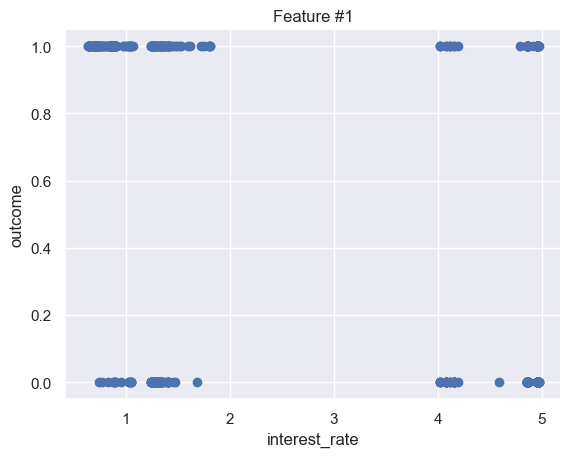

In [14]:
plt.scatter(df['interest_rate'], df['y'])
plt.xlabel('interest_rate')
plt.ylabel('outcome')
plt.title('Feature #1')

Text(0.5, 1.0, 'Feature #2')

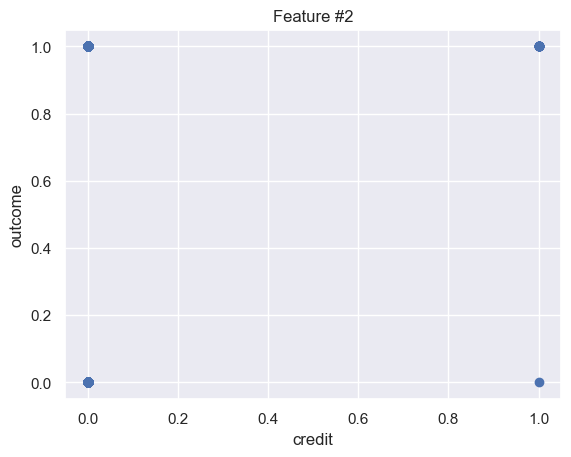

In [15]:
plt.scatter(df['credit'], df['y'])
plt.xlabel('credit')
plt.ylabel('outcome')
plt.title('Feature #2')

Text(0.5, 1.0, 'Feature #3')

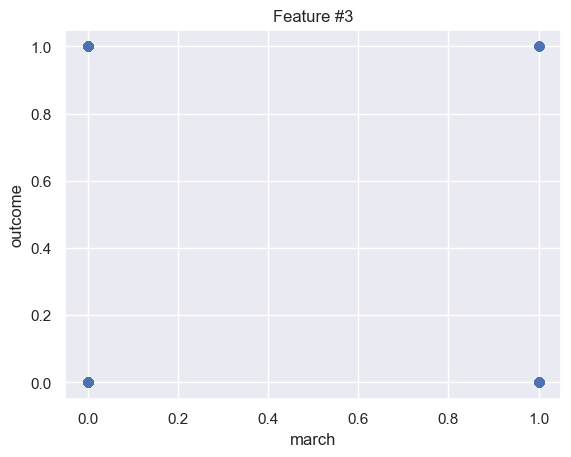

In [16]:
plt.scatter(df['march'], df['y'])
plt.xlabel('march')
plt.ylabel('outcome')
plt.title('Feature #3')

Text(0.5, 1.0, 'Feature #4')

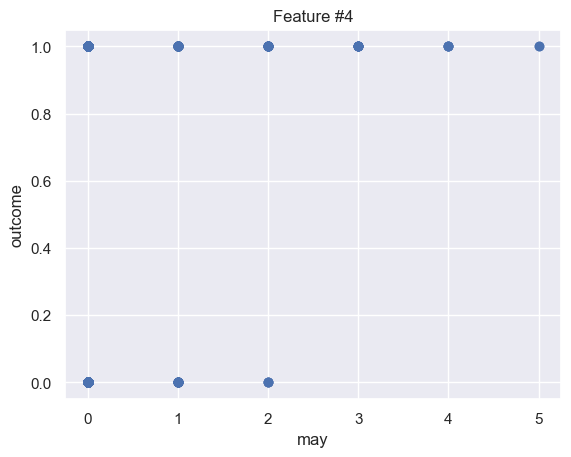

In [17]:
plt.scatter(df['may'], df['y'])
plt.xlabel('may')
plt.ylabel('outcome')
plt.title('Feature #4')

Text(0.5, 1.0, 'Feature #5')

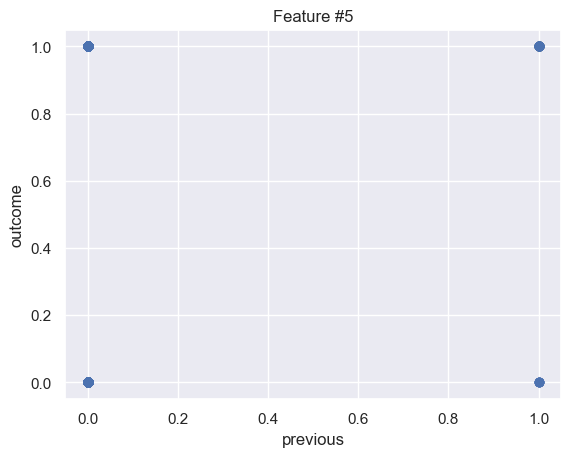

In [18]:
plt.scatter(df['previous'], df['y'])
plt.xlabel('previous')
plt.ylabel('outcome')
plt.title('Feature #5')

Text(0.5, 1.0, 'Feature #6')

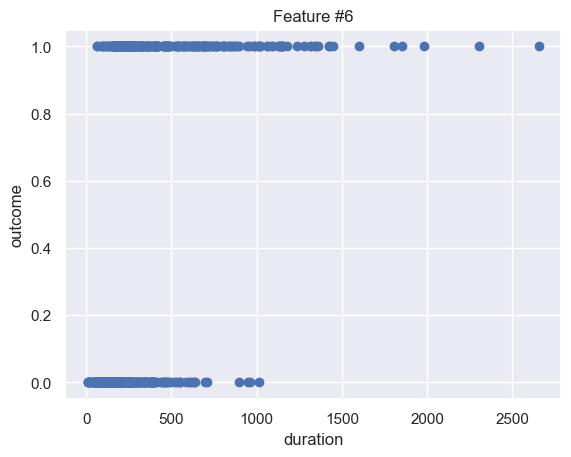

In [19]:
plt.scatter(df['duration'], df['y'])
plt.xlabel('duration')
plt.ylabel('outcome')
plt.title('Feature #6')

In [20]:
X1 = df['duration']
y = df['y']

### Simple Logistic Regression

In [21]:
x = sm.add_constant(X1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Fri, 18 Nov 2022   Pseudo R-squ.:                  0.2121
Time:                        23:59:29   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

In [25]:
estimators=['interest_rate','credit','march','previous','duration']

X1 = df[estimators]
y = df['y']

In [27]:
X = sm.add_constant(X1)
reg_logit = sm.Logit(y,X1)
results_logit = reg_logit.fit()
results_logit.summary2()

Optimization terminated successfully.
         Current function value: 0.336668
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.514     
Dependent Variable: y                AIC:              358.7881  
Date:               2022-11-19 00:02 BIC:              380.0380  
No. Observations:   518              Log-Likelihood:   -174.39   
Df Model:           4                LL-Null:          -359.05   
Df Residuals:       513              LLR p-value:      1.1845e-78
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
interest_rate    -0.8030   0.0787 -10.2013 0.0000 -0.9573 -0.6487
credit            2.3459   1.0712   2.1899 0.0285  0.2463  4.4455
march            -1.8387   0.3153  -5.8307 0.0000 -2.4567 -1.2206
previous          1.5262   0.4785   3.1899 0.0014  0.5885  2.4640
duration          0.0069   0.0007  10.3646 0.0000  0.0056  0.0082
=================================================================

"""